# **키와 몸무게의 지표 확인**

## **data split 없이 진행**

In [ ]:
# Step 1. 분석할 데이터가 저장된 파일을 불러와서 변수에 할당합니다

import pandas as pd
df = pd.read_csv('키와몸무게.csv', encoding='cp949')

df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [ ]:
# pandas를 통해 데이터를 확인합니다.

print(df.size)

# 파운드로 적혀 있는 무게 값을 KG 단위로 변환합니다
# 1 파운드 = 0.45359237kg

df['Weight'] = df['Weight'] * 0.45359237

# inch로 적혀 있는 키 값을 cm 단위로 변환합니다
# 1 inch = 2.54cm

df['Height'] = df['Height'] * 2.54

df

30000


,Gender,Height,Weight
0,Male,187.571423,109.721075
1,Male,174.706036,73.622792
2,Male,188.239668,96.497629
3,Male,182.196685,99.809586
4,Male,177.499761,93.598695
...,...,...,...
9995,Female,168.078536,62.041210
9996,Female,170.350573,77.504378
9997,Female,162.224700,58.275424
9998,Female,175.346978,74.322226


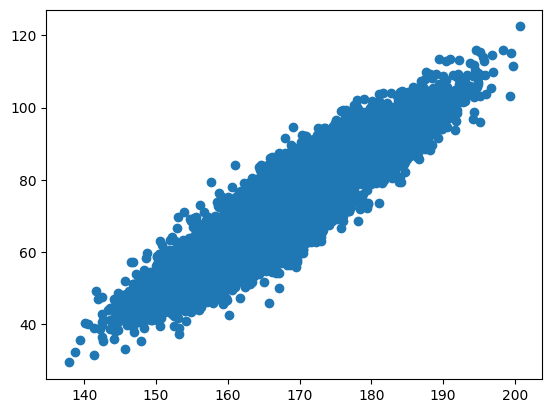

In [ ]:
# 키와 몸무게에 관한 산점도를 그려봅니다
# 산점도가 직선의 방향을 지니고 있을 때, 선형회귀를 사용합니다

import matplotlib.pyplot as plt

height = df['Height']
weight = df['Weight']

plt.plot(height, weight, 'o')
plt.show()

In [ ]:
# 선형회귀 모델을 통한 학습을 진행합니다
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(df['Height'].to_numpy().reshape(-1, 1), df['Weight'].to_numpy())

LinearRegression()

In [ ]:
# 학습한 내용을 바탕으로 예측합니다

print(lr.predict([[170]]))

[75.19390579]


In [ ]:
# 회귀식의 기울기와 절편을 구합니다
# 기울기: coef_, 절편: intercept_

print('▶ 기울기:', lr.coef_)
print('▶ 절편:', lr.intercept_)

▶ 기울기: [1.37815071]
▶ 절편: -159.09171408121202


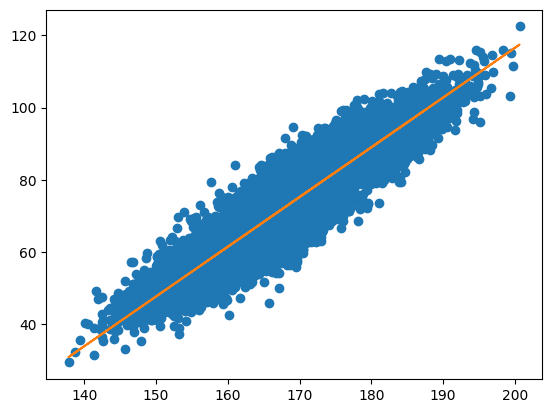

In [ ]:
# 예측값 그래프 그리기

plt.plot(height, weight, 'o')
plt.plot(height, lr.predict(height.values.reshape(-1, 1)))
plt.show()

## **data split을 통한 모델 검증**

In [ ]:
# case 2: 훈련용 데이터셋과 테스트용 데이터셋 나누어서 분석
from sklearn.model_selection import train_test_split

# train, test 분리를 위해 numpy 배열로 전환
data = df['Height'].to_numpy()
target = df['Weight'].to_numpy()

# train, test 분리
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state = 1)

# 행(row)으로 나열된 데이터를 열(column) 단위로 변경
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

print('▶ 학습 데이터:', X_train.shape)
print('▶ 테스트 데이터:', X_test.shape)
print('▶ 학습 데이터 정답:', y_train.shape)
print('▶ 학습 데이터 정답:', y_test.shape)

In [ ]:
# 선형회귀모델 학습
lr = LinearRegression()
lr.fit(X_train, y_train)

# [170] 데이터 넣어서 예측값 확인하기
pred = lr.predict([[170]])
print(pred)

[75.18687177]


In [ ]:
# score 확인
lr.score(X_test, y_test)

0.8676317463826752

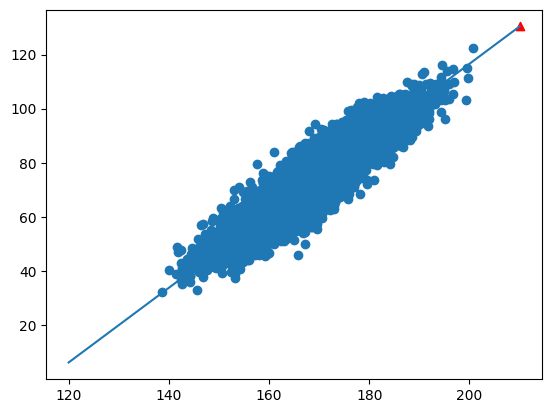

In [ ]:
# 예측 그래프 그리기
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train)
plt.plot([120, 210], [120 * lr.coef_ + lr.intercept_, 210 * lr.coef_ + lr.intercept_])
plt.scatter(210, 210 * lr.coef_ + lr.intercept_, marker='^', color='red')
plt.show()

# **로지스틱회귀분석**

### 공부시간에 따른 시험 합격 여부

In [ ]:
# Step 1. 분석할 데이터가 저장된 파일을 불러와서 변수에 할당합니다
from google.colab import files

myfile = files.upload()

import io
import pandas as pd

study = pd.read_csv(io.BytesIO(myfile['공부시간과시험합격.csv']), encoding='cp949')

# 로컬 데이터 로드
# 컴퓨터에서 작업하려면 아래 코드의 주석을 제거하고 실행

# import pandas as pd
# study = pd.read_csv('../머신러닝실습용자료/공부시간과시험합격.csv', encoding='cp949')

Saving 공부시간과시험합격.csv to 공부시간과시험합격.csv


,이름,공부시간,시험점수,합격여부
0,이원재,15.0,85.0,합격
1,맹승주,14.5,86.5,합격
2,안미경,14.0,86.0,합격
3,서진수,13.5,85.5,합격
4,황경인,13.0,85.0,합격
5,신운무,12.0,83.0,합격
6,권율,12.0,85.0,합격
7,강준,11.0,82.0,합격
8,신사임당,11.0,83.0,합격
9,문무왕,10.5,82.0,합격


In [ ]:
# Step 2: 훈련용 데이터셋과 테스트용 데이터셋 나누어서 분석

from sklearn.model_selection import train_test_split

data = study['공부시간'].to_numpy()
train = study['합격여부'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(data, train, test_size=0.3, random_state=40)

In [ ]:
# Step 3: 학습 후 모델을 생성하고 예측을 수행합니다
from sklearn.linear_model import LogisticRegression

# 로지스틱회귀 모델 생성
lr = LogisticRegression()

# 행(row)으로 되어 있는 데이터, 열(column)로 나열 (1개의 열만 활용할 때)

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

# 모델 학습
lr.fit(X_train, y_train)

# 테스트용_data로 예측

print(X_test)
print(lr.predict(X_test))

[[ 9. ]
 [ 7. ]
 [ 9.3]
 [ 8.4]
 [ 9.5]
 [13.5]
 [ 8. ]
 [14. ]]
['불합격' '불합격' '불합격' '불합격' '합격' '합격' '불합격' '합격']


In [ ]:
import numpy as np

# 각 항목별 확률값 출력
print(np.round(lr.predict_proba(X_test), 3))

[[0.65  0.35 ]
 [0.981 0.019]
 [0.53  0.47 ]
 [0.835 0.165]
 [0.447 0.553]
 [0.001 0.999]
 [0.908 0.092]
 [0.    1.   ]]


### 무게, 길이, 당도를 통한 과일과 채소 종류 구분

In [ ]:
# 다중 분류 활용-과일 종류 분류하기
#Step 1.분석할 데이터가 저장된 파일을 불러와서 변수에 할당합니다.
from google.colab import files

myfile = files.upload()

import io
import pandas as pd

#pd.read_csv로 csv파일 불러오기
fruit_2 = pd.read_csv(io.BytesIO(myfile['과일채소목록_2.csv']),encoding='cp949')
fruit_2

# 로컬 데이터 로드
# 컴퓨터에서 작업하려면 아래 코드 주석 제거 후 실행

# import pandas as pd
# fruit_2 = pd.read_csv('../머신러닝실습용자료/과일채소목록_2.csv', encoding='cp949')

Saving 과일채소목록_2.csv to 과일채소목록_2.csv


,종류,무게_g,길이_cm,당도,등급
0,거봉포도,291,29.1,9.1,A
1,거봉포도,290,29.0,9.0,A
2,거봉포도,281,28.1,8.1,B
3,거봉포도,280,28.0,8.0,B
4,거봉포도,271,26.1,8.6,B
5,거봉포도,270,26.0,8.5,B
6,거봉포도,251,25.1,7.6,C
7,거봉포도,250,25.0,7.5,C
8,거봉포도,221,22.1,7.1,C
9,거봉포도,220,22.0,7.0,C


In [ ]:
# Step 2: 훈련용 데이터셋과 테스트용 데이터셋 나누어서 분석
from sklearn.model_selection import train_test_split

data2 = fruit_2[['무게_g', '길이_cm', '당도']]
train2 = fruit_2['종류']

X_train2, X_test2, y_train2, y_test2 = train_test_split(data2, train2, test_size=0.2, random_state=40)

In [ ]:
# Step 3: 데이터 표준화 진행 (평균: 0, 표준편차: 1) → KNN과 같은 숫자 기반일 경우 추천

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train2)

standard_train_data = ss.transform(X_train2)
standard_test_data = ss.transform(X_test2)

In [ ]:
# 모델을 생성하고 테스트하고 성능을 확인
from sklearn.linear_model import LogisticRegression
import numpy as np

# 로지스틱회귀분석 모델 생성 및 학습
# C: 정규화 정도를 조절 (기본값: 1)
# C가 작을 수록 정규화 강하게, 과적합 방지
# C가 클수록 정규화 약하게, 데이터에 잘 맞춤(과적합 발생할 수 있음)
# C값 범위 : 0.0001 ~ 10000
# max_iter 기본값 : 100

softmax_reg = LogisticRegression(C=5, max_iter=200)
softmax_reg.fit(standard_train_data, y_train2)

# 분류 결과 확인
print(softmax_reg.predict(standard_test_data))

# 분류 확률 확인
print(np.round(softmax_reg.predict_proba(standard_test_data), 3))

# 분류 점수 확인
print(softmax_reg.score(standard_test_data, y_test2))

['자두' '옥수수' '참외' '자두' '참외' '거봉포도' '수박' '거봉포도' '수박' '거봉포도']
[[0.003 0.001 0.003 0.823 0.17 ]
 [0.004 0.001 0.991 0.    0.004]
 [0.013 0.012 0.027 0.304 0.644]
 [0.003 0.    0.001 0.866 0.13 ]
 [0.031 0.023 0.013 0.181 0.752]
 [0.989 0.006 0.001 0.    0.004]
 [0.011 0.796 0.001 0.    0.191]
 [0.974 0.01  0.003 0.    0.012]
 [0.    0.998 0.    0.    0.002]
 [0.979 0.009 0.005 0.    0.007]]
1.0


# **KNN**

## 수박, 참외 맞추기

In [ ]:
# Step 1. 구글 코랩에 한글폰트 설정

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
# Step 2: 분석할 데이터가 저장된 파일을 불러와서 변수에 할당
from google.colab import files

myfile = files.upload()

import io
import pandas as pd

src_data = pd.read_csv(io.BytesIO(myfile['수박과참외.csv']), encoding='cp949')
src_data

Saving 수박과참외.csv to 수박과참외.csv


,종류,무게,길이
0,수박,2000,30.0
1,수박,2500,25.0
2,수박,1800,20.0
3,수박,1500,16.0
4,수박,900,10.0
5,수박,2500,33.0
6,수박,2250,23.0
7,수박,1860,17.0
8,수박,2100,21.0
9,수박,1500,17.0


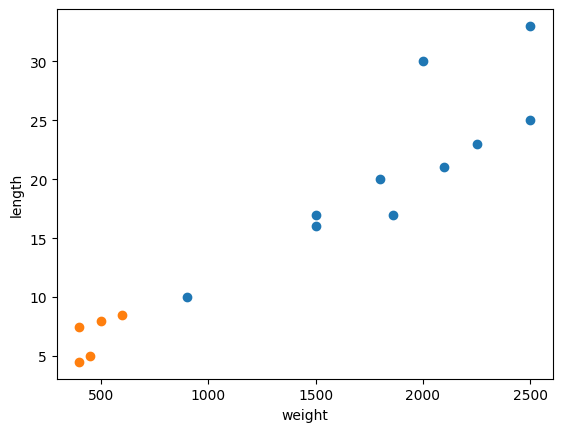

In [ ]:
wm_info = src_data.loc[(src_data['종류'] == '수박'), ['무게', '길이']]
om_info = src_data.loc[(src_data['종류'] == '참외'), ['무게', '길이']]

import matplotlib.pyplot as plt

plt.scatter(wm_info['무게'], wm_info['길이'])
plt.scatter(om_info['무게'], om_info['길이'])
plt.xlabel('weight')
plt.ylabel('length')
plt.show()

In [ ]:
import numpy as np

# np.column_stack을 통해 무게와 길이를 data 변수에 넣는다
data = np.column_stack([src_data['무게'], src_data['길이']])

# 데이터의 종류를 target에 넣는다
target = src_data['종류']

print(data)
print(target)

[[2000.    30. ]
 [2500.    25. ]
 [1800.    20. ]
 [1500.    16. ]
 [ 900.    10. ]
 [2500.    33. ]
 [2250.    23. ]
 [1860.    17. ]
 [2100.    21. ]
 [1500.    17. ]
 [ 500.     8. ]
 [ 400.     7.5]
 [ 450.     5. ]
 [ 400.     4.5]
 [ 600.     8.5]]
0     수박
1     수박
2     수박
3     수박
4     수박
5     수박
6     수박
7     수박
8     수박
9     수박
10    참외
11    참외
12    참외
13    참외
14    참외
Name: 종류, dtype: object


In [ ]:
# Step 4. 주어진 데이터를 훈련용과 테스트(검증용)으로 분류
from sklearn.model_selection import train_test_split

X_train3, X_test3, y_train3, y_test3 = train_test_split(data, target, test_size = 0.25, random_state=40)

In [ ]:
# 데이터 구조(shape 확인)

print(X_train3.shape, X_test3.shape)

(11, 2) (4, 2)


In [ ]:
# Step 5. 분석하여 모델을 생성
from sklearn.neighbors import KNeighborsClassifier

# knn 모델 생성
knn = KNeighborsClassifier(n_neighbors=5)

# 모델 학습
knn.fit(X_train3, y_train3)

# 모델 평가
knn.score(X_test3, y_test3)

0.25

In [ ]:
# Step 6. 모델이 정확한지 임의의 데이터로 테스트

print(knn.predict([[1000, 15]]))

['수박']


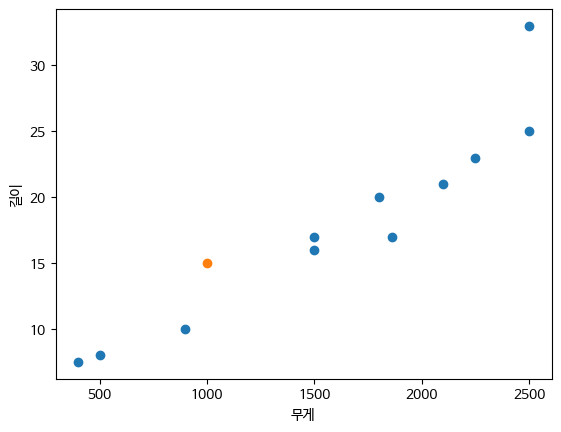

In [ ]:
# Step 7. 위 데이터의 값을 그래프로 출력하여 확인

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

plt.scatter(X_train3[:,0], X_train3[:,1])
plt.scatter(1000, 15, marker='o')
plt.xlabel('무게')
plt.ylabel('길이')
plt.show()

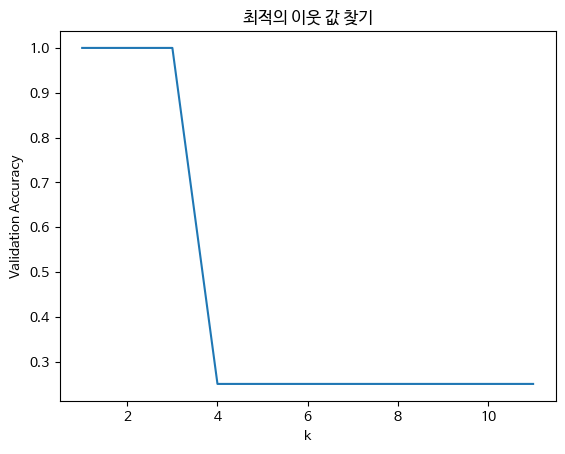

In [ ]:
# Step 8. 최적의 K 값 찾기

# K값이 작으면 작을수록 과적합이 일어날 확률이 높음 → 가능한 큰 값을 선택하는게 좋음
# K값이 클수록 과소적합(underfitting)이 일어날 확률이 높음 → 너무 크면 안됨

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

k_list = range(1, 12)
accuracies = []

for k in k_list:
  classifer = KNeighborsClassifier(n_neighbors = k)
  classifer.fit(X_train3, y_train3)
  accuracies.append(classifer.score(X_test3, y_test3))

plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel('Validation Accuracy')
plt.title('최적의 이웃 값 찾기')
plt.show()

In [ ]:
# 최적의 K 값 가지고 실행

from sklearn.neighbors import KNeighborsClassifier

# knn 모델 생성
knn = KNeighborsClassifier(n_neighbors=3)

# 모델 학습
knn.fit(X_train3, y_train3)

# 모델 평가
knn.score(X_test3, y_test3)

1.0

# **오후 실습**

## **로지스틱회귀분석 다중분류 실습**

In [ ]:
# Step 1. 분석할 데이터가 저장된 파일을 불러와서 변수에 할당

from google.colab import files

myfile = files.upload()

import io
import pandas as pd

# pd.read_csv로 csv 파일 불러오기
fish3 = pd.read_csv(io.BytesIO(myfile['fish3.csv']), encoding='cp949')
fish3

Saving fish3.csv to fish3.csv


,종류,무게,길이,높이,두께
0,도미,242.0,25.4,11.5200,4.0200
1,도미,290.0,26.3,12.4800,4.3056
2,도미,340.0,26.5,12.3778,4.6961
3,도미,363.0,29.0,12.7300,4.4555
4,도미,430.0,29.0,12.4440,5.1340
...,...,...,...,...,...
143,빙어,12.2,12.2,2.0904,1.3936
144,빙어,13.4,12.4,2.4300,1.2690
145,빙어,12.2,13.0,2.2770,1.2558
146,빙어,19.7,14.3,2.8728,2.0672


In [ ]:
# Step 2. 훈련용 데이터셋과 테스트용 데이터셋 나누어서 분석
from sklearn.model_selection import train_test_split

# 무게, 길이, 높이, 두께에 따른 종류 분류
data = fish3[['무게', '길이', '높이', '두께']]
target = fish3['종류']

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=3, random_state=40)

In [ ]:
# Step 3. 데이터 표준화 진행
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)

standard_train_data = ss.transform(X_train)
standard_test_data = ss.transform(X_test)

In [ ]:
# 모델을 생성하고 테스트하고 성능을 확인
from sklearn.linear_model import LogisticRegression
import numpy as np

# 로지스틱 회귀 모델 생성
lr = LogisticRegression(C=5, max_iter=200)

# 모델 학습
lr.fit(standard_train_data, y_train)

# 모델 예측 결과 출력
print(lr.predict(standard_test_data))

# 분류 확률 출력
print(np.round(lr.predict_proba(standard_test_data), 3))

# 점수 출력
print(lr.score(standard_test_data, y_test))

['농어' '농어' '농어']
[[0.004 0.531 0.002 0.1   0.017 0.346]
 [0.011 0.61  0.003 0.034 0.023 0.319]
 [0.008 0.527 0.005 0.02  0.029 0.41 ]]
0.6666666666666666


## **로지스틱회귀분석 이진분류 실습**

In [ ]:
# Step 1. 분석할 데이터가 저장된 파일을 불러와서 변수에 할당

from google.colab import files

myfile = files.upload()

import io
import pandas as pd

# pd.read_csv로 csv 파일 불러오기
fish2 = pd.read_csv(io.BytesIO(myfile['fish2.csv']), encoding='cp949')
fish2

Saving fish2.csv to fish2.csv


,종류,무게
0,도미,430
1,도미,450
2,도미,500
3,도미,390
4,도미,450
5,도미,500
6,도미,475
7,도미,500
8,도미,500
9,도미,600


In [ ]:
# Step 2. 훈련용 데이터셋과 테스트용 데이터셋 나누어서 분석
from sklearn.model_selection import train_test_split

# 무게에 따른 종류 분류
data = fish2['무게'].to_numpy()
target = fish2['종류'].to_numpy()

# train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state=40)

In [ ]:
# Step 3. 학습 후 모델을 생성하고 예측을 수행합니다
from sklearn.linear_model import LogisticRegression

# 로지스틱 회귀분석 모델 생성
lr = LogisticRegression()

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

# 학습
lr.fit(X_train, y_train)

# 예측
lr.predict(X_test)

array(['잉어', '도미', '잉어', '잉어', '도미', '도미', '도미', '도미', '도미', '도미'],
      dtype=object)

In [ ]:
# 각 항목별 확률값 출력
print(np.round(lr.predict_proba(X_test), 3))

[[0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [ ]:
print(lr.predict([[400]]))

['도미']


In [ ]:
print(lr.predict([[200]]))

['잉어']


## **KNN 분류 실습**

In [ ]:
# Step 1. 구글 코랩에 한글 폰트 설정하기

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
# Step 2. 분석할 데이터가 저장된 파일을 불러와서 변수에 할당
from google.colab import files

myfile = files.upload()

import io
import pandas as pd

fish = pd.read_csv(io.BytesIO(myfile['fish1.csv']), encoding='cp949')
fish

Saving fish1.csv to fish1.csv


,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
5,Bream,450.0,29.7,34.7,13.6024,4.9274
6,Bream,500.0,29.7,34.5,14.1795,5.2785
7,Bream,390.0,30.0,35.0,12.6700,4.6900
8,Bream,450.0,30.0,35.1,14.0049,4.8438
9,Bream,500.0,30.7,36.2,14.2266,4.9594


In [ ]:
# 생성 데이터 프레임에서, 도미와 방어의 데이터로 분리 (df.loc 추천)
# 도미 : Species가 Bream인 행
# 두께: Width
# 무게: Weight

bream = fish.loc[(fish['Species'] == 'Bream'), ['Width', 'Weight']]
bream_width = bream['Width']
bream_weight = bream['Weight']

print('도미수:', len(bream_width))

smelt = fish.loc[(fish['Species'] == 'Smelt'), ['Width', 'Weight']]
smelt_width = smelt['Width']
smelt_weight = smelt['Weight']

print('빙어수:', len(smelt_width))

도미수: 35
빙어수: 14


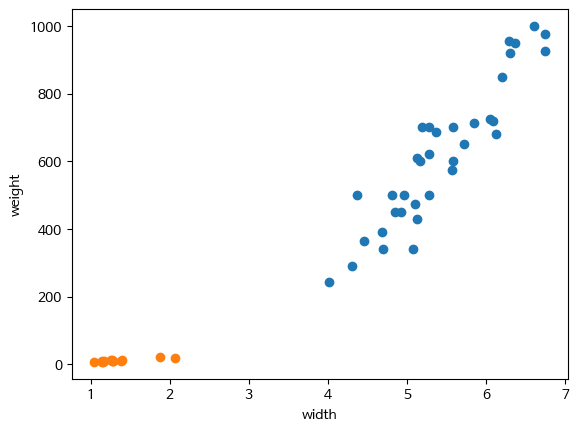

In [ ]:
import matplotlib.pyplot as plt

# 도미와 방어의 두께, 무게 산점도 그리기

plt.scatter(bream_width, bream_weight)
plt.scatter(smelt_width, smelt_weight)
plt.xlabel('width')
plt.ylabel('weight')
plt.show()

In [ ]:
import numpy as np

# 가로로 나열되어 있는 Weight와 Width 세로로 합쳐서 data 만들기
data = np.column_stack([fish['Weight'], fish['Width']])

# 물고기 종류로 target 만들기
target = fish['Species']

In [ ]:
# train, test 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=40)

In [ ]:
# KNN 라이브러리 import
from sklearn.neighbors import KNeighborsClassifier

# KNN 모델 생성
knn = KNeighborsClassifier(n_neighbors=5)

# KNN 모델 학습
knn.fit(X_train, y_train)

# score 출력
knn.score(X_test, y_test)

1.0

In [ ]:
# 데이터 넣어서 결과 확인: ['Smelt']
print(knn.predict([[25, 1.5]]))

['Smelt']


In [ ]:
# 데이터 넣어서 결과 확인: ['Bream']
print(knn.predict([[250, 5.1]]))

['Bream']


## **다이아몬드 가격 분류**

In [ ]:
import pandas as pd

data = pd.read_csv('./diamonds.csv', encoding='cp949')

data = data.drop(['Unnamed: 0'], axis=1)

data = data.drop(data[data['x'] == 0].index)
data = data.drop(data[data['y'] == 0].index)
data = data.drop(data[data['z'] == 0].index)

data = data[(data['depth'] < 75) & (data['depth'] > 45)]
data = data[(data['table'] < 80) & (data['table'] > 40)]
data = data[(data['x']<30)]
data = data[(data['y']<30)]
data = data[(data['z']<30) & (data['z']>2)]

data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
from sklearn.preprocessing import LabelEncoder

s = (data.dtypes == 'object')
object_cols = list(s[s].index)

label_data = data.copy()
label_encoder = LabelEncoder()

for col in object_cols:
  label_data[col] = label_encoder.fit_transform(label_data[col])

In [ ]:
from sklearn.model_selection import train_test_split

data = label_data.drop(['price'], axis=1)
target = label_data['price']

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=7)

In [ ]:
print('\nMAX Price: ', label_data['price'].max())
print('MAX Price Data: ')
print(label_data.loc[(label_data['price'] == label_data['price'].max()), ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']])


MAX Price:  18823
MAX Price Data: 
       carat  cut  color  clarity  depth  table    x     y     z
27749   2.29    3      5        5   60.8   60.0  8.5  8.47  5.16


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

pipeline_lr = Pipeline([('scalar1', StandardScaler()), ('lr_classifer', LinearRegression())])
pipeline_dt = Pipeline([('scalar2', StandardScaler()), ('lr_classifer', DecisionTreeRegressor())])
pipeline_rf = Pipeline([('scalar3', StandardScaler()), ('lr_classifer', RandomForestRegressor())])
pipeline_kn = Pipeline([('scalar4', StandardScaler()), ('lr_classifer', KNeighborsRegressor())])
pipeline_xgb = Pipeline([('scalar5', StandardScaler()), ('lr_classifer', XGBRegressor())])

pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]
pipe_dict = {0: 'LinearRegression', 1: 'DecisionTree', 2: 'RandomForest', 3: 'KNeighbors', 4: 'XGBRegressor'}

for pipe in pipelines:
  pipe.fit(X_train, y_train)

In [ ]:
predict_data = [[2.29, 3, 5, 5, 60.8, 60.0, 8.5, 8.47, 5.16]]

In [ ]:
for i, model in enumerate(pipelines):
  print('▶ %s 모델 분석값: %s' %(pipe_dict[i], model.predict(predict_data)))
  print('▶ %s 모델 정확도: %f' %(pipe_dict[i], model.score(X_test, y_test)))
  print('\n')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


▶ LinearRegression 모델 분석값: [17016.80633368]
▶ LinearRegression 모델 정확도: 0.889011


▶ DecisionTree 모델 분석값: [18823.]
▶ DecisionTree 모델 정확도: 0.964793


▶ RandomForest 모델 분석값: [18529.82]
▶ RandomForest 모델 정확도: 0.980802


▶ KNeighbors 모델 분석값: [17273.8]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


▶ KNeighbors 모델 정확도: 0.959938


▶ XGBRegressor 모델 분석값: [17752.445]
▶ XGBRegressor 모델 정확도: 0.980384




/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

print('▶ 모델 분석값: ', lr.predict(predict_data))
print('▶ 모델 정확도: ', lr.score(X_test, y_test))

▶ 모델 분석값:  [17016.80633368]
▶ 모델 정확도:  0.8890105065854332


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
